In [34]:
import pandas as pd

In [2]:
df = pd.read_excel('Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
# Konversi ke string
df['transaction_time'] = df['transaction_time'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df['month'] = df['transaction_date'].dt.month_name()
df['date'] = df['transaction_date'].dt.day
df["day"] = df["transaction_date"].dt.day_name()
df['hour'] = df['transaction_time'].str.split(':').str[0]
df["total_revenue"] = df["transaction_qty"] * df["unit_price"]
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,date,day,hour,total_revenue
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,1,Sunday,07,6.00
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1,Sunday,07,6.20
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,1,Sunday,07,9.00
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,1,Sunday,07,2.00
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1,Sunday,07,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,June,30,Friday,20,5.00
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,June,30,Friday,20,6.00
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,June,30,Friday,20,3.00
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,30,Friday,20,3.75


In [6]:
def label(a):
  if a <= 10 :
    return 'Awal Bulan'
  elif a <= 20 :
    return 'Pertengahan Bulan'
  else:
    return 'Akhir Bulan'

df['Remarks_Month'] = df['date'].apply(label)
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,date,day,hour,total_revenue,Remarks_Month
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,1,Sunday,07,6.00,Awal Bulan
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1,Sunday,07,6.20,Awal Bulan
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,1,Sunday,07,9.00,Awal Bulan
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,1,Sunday,07,2.00,Awal Bulan
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1,Sunday,07,6.20,Awal Bulan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,June,30,Friday,20,5.00,Akhir Bulan
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,June,30,Friday,20,6.00,Akhir Bulan
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,June,30,Friday,20,3.00,Akhir Bulan
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,30,Friday,20,3.75,Akhir Bulan


In [7]:
df['hour'] = df['hour'].astype(int)

In [8]:
def label(a):
  if a <= 12 :
    return 'Pagi'
  elif a <= 16 :
    return 'Siang'
  elif a <= 18 :
    return 'Sore'
  else:
    return 'Malam'

df['time'] = df['hour'].apply(label)
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,date,day,hour,total_revenue,Remarks_Month,time
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,1,Sunday,7,6.00,Awal Bulan,Pagi
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1,Sunday,7,6.20,Awal Bulan,Pagi
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,1,Sunday,7,9.00,Awal Bulan,Pagi
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,1,Sunday,7,2.00,Awal Bulan,Pagi
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1,Sunday,7,6.20,Awal Bulan,Pagi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,June,30,Friday,20,5.00,Akhir Bulan,Malam
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,June,30,Friday,20,6.00,Akhir Bulan,Malam
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,June,30,Friday,20,3.00,Akhir Bulan,Malam
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,30,Friday,20,3.75,Akhir Bulan,Malam


In [9]:
columnValue = df.nunique().reset_index()
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [10]:
transaction = df.groupby('transaction_date')['transaction_id'].count().reset_index()
transaction

,transaction_date,transaction_id
0,2023-01-01,550
1,2023-01-02,566
2,2023-01-03,582
3,2023-01-04,497
4,2023-01-05,547
...,...,...
176,2023-06-26,1195
177,2023-06-27,1277
178,2023-06-28,1070
179,2023-06-29,1009


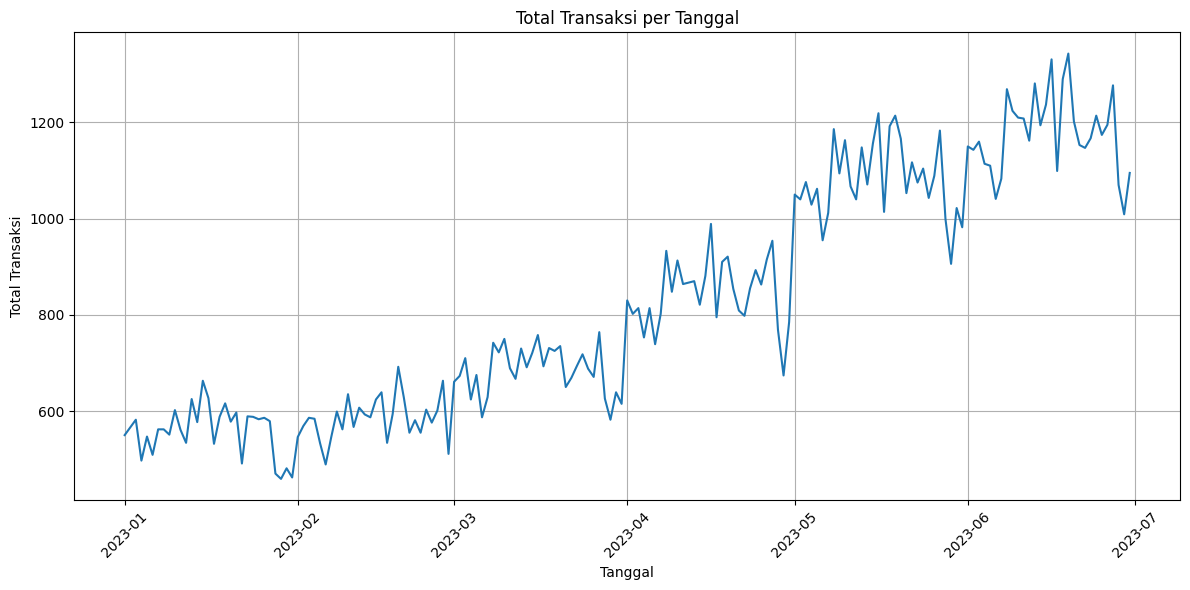

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=transaction, x='transaction_date', y='transaction_id')
plt.title('Total Transaksi per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Total Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Urutan Bulan
Daftar_bulan = ['January', 'February', 'March', 'April', 'May', 'June']

monthly_transaction = df.groupby('month')['transaction_id'].count().reset_index()

# Atur kolom 'month' sebagai kategori dengan urutan yang benar
monthly_transaction['month'] = pd.Categorical(monthly_transaction['month'], categories=Daftar_bulan, ordered=True)

# Urutkan DataFrame berdasarkan kolom 'month'
monthly_transaction = monthly_transaction.sort_values('month').reset_index(drop=True)
monthly_transaction

,month,transaction_id
0,January,17314
1,February,16359
2,March,21229
3,April,25335
4,May,33527
5,June,35352


<ipython-input-13-0641f0aaf0ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=monthly_transaction, x='month', y='transaction_id', palette='viridis')


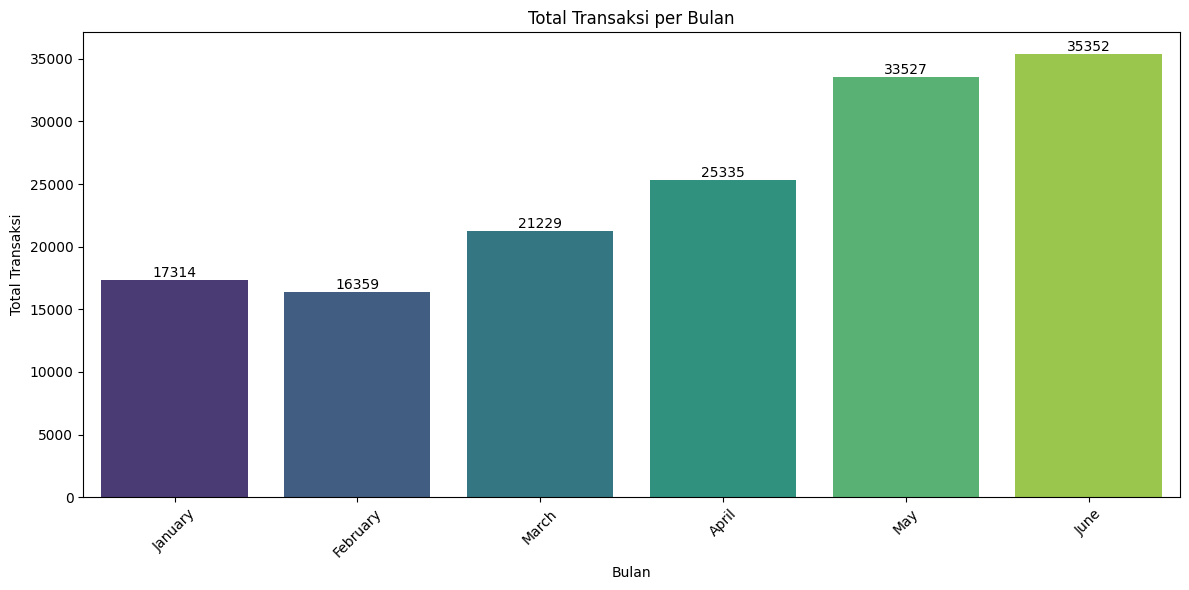

In [13]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=monthly_transaction, x='month', y='transaction_id', palette='viridis')
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')
plt.title('Total Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
Date_marks = df.groupby('Remarks_Month')['transaction_id'].count().reset_index()
Date_marks = Date_marks.sort_values(by='transaction_id', ascending=False)
Date_marks

,Remarks_Month,transaction_id
2,Pertengahan Bulan,51512
0,Akhir Bulan,49235
1,Awal Bulan,48369


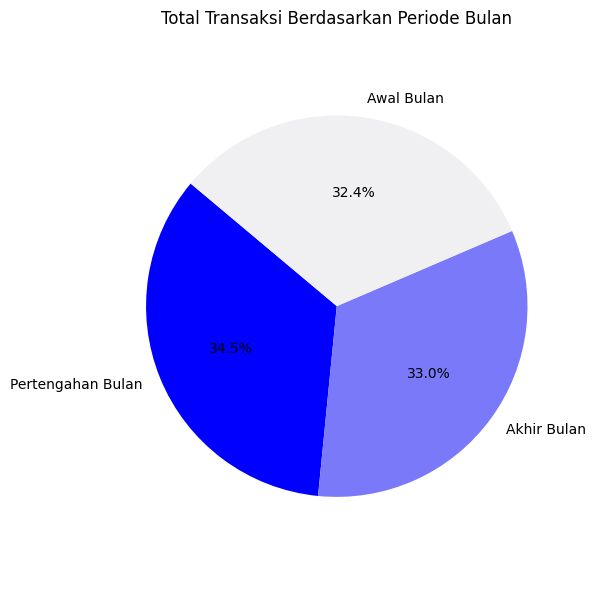

In [15]:
# Membuat pie chart
colors = sns.light_palette("blue", n_colors=len(Date_marks), reverse=True)
plt.figure(figsize=(6, 6))
plt.pie(Date_marks['transaction_id'],
        labels=Date_marks['Remarks_Month'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)
plt.title('Total Transaksi Berdasarkan Periode Bulan')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [16]:
# Urutan Hari
Daftar_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Day = df.groupby('day')['transaction_id'].count().reset_index()

# Atur kolom 'day' sebagai kategori dengan urutan yang benar
Day['day'] = pd.Categorical(Day['day'], categories=Daftar_hari, ordered=True)

# Urutkan DataFrame berdasarkan kolom 'day'
Day = Day.sort_values('day').reset_index(drop=True)
Day

,day,transaction_id
0,Monday,21643
1,Tuesday,21202
2,Wednesday,21310
3,Thursday,21654
4,Friday,21701
5,Saturday,20510
6,Sunday,21096


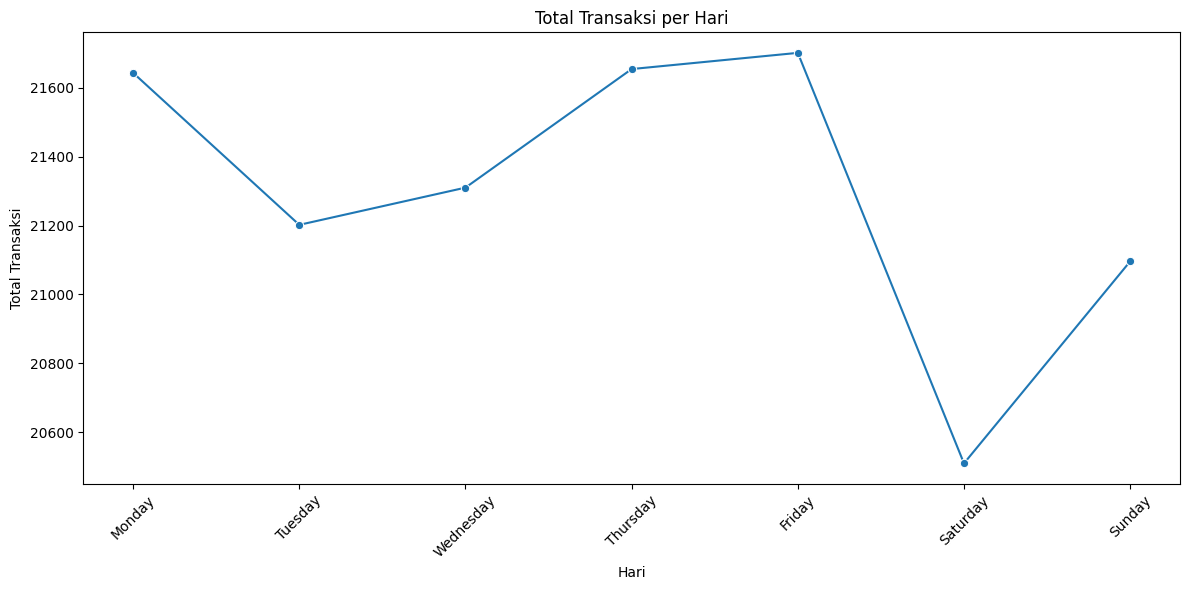

In [17]:
# Membuat line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=Day, x='day', y='transaction_id', marker='o')
plt.title('Total Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Total Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
Hour = df.groupby('hour')['transaction_id'].count().reset_index()
Hour

,hour,transaction_id
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


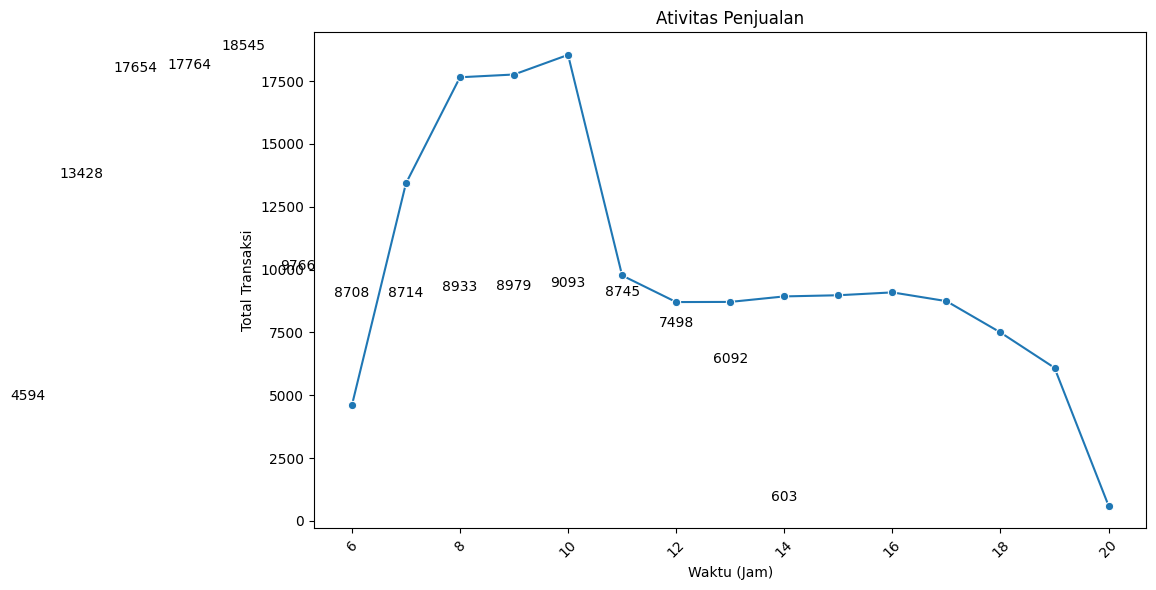

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Hour, x='hour', y='transaction_id', marker='o')
for i in range(len(Hour)):
    plt.text(i, Hour['transaction_id'][i] + 200,
             Hour['transaction_id'][i],
             ha='center')
plt.title('Ativitas Penjualan')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Total Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
location = df.groupby('store_location')['transaction_id'].count().reset_index()
location = location.sort_values(by='transaction_id', ascending=False)
location

,store_location,transaction_id
1,Hell's Kitchen,50735
0,Astoria,50599
2,Lower Manhattan,47782


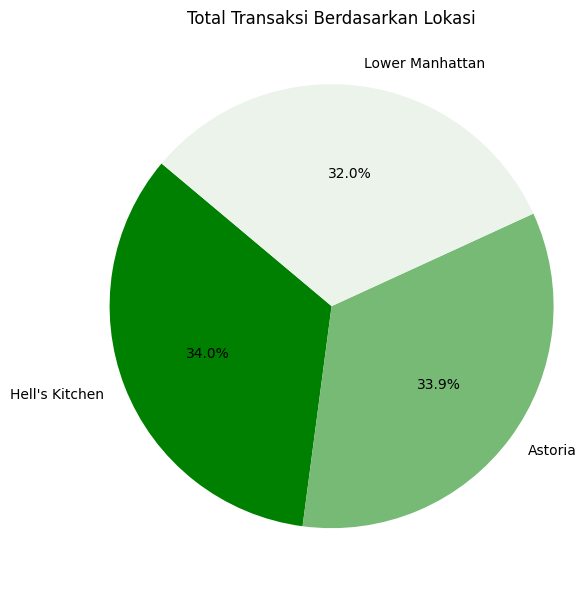

In [21]:
# Membuat pie chart
colors = sns.light_palette("green", n_colors=len(location), reverse=True)
plt.figure(figsize=(6, 6))
plt.pie(location['transaction_id'],
        labels=location['store_location'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)
plt.title('Total Transaksi Berdasarkan Lokasi')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [22]:
product_cat = df.groupby('product_category')['transaction_id'].count().reset_index()
product_cat = product_cat.sort_values(by='transaction_id', ascending=False)
product_cat

,product_category,transaction_id
2,Coffee,58416
8,Tea,45449
0,Bakery,22796
4,Drinking Chocolate,11468
5,Flavours,6790
3,Coffee beans,1753
6,Loose Tea,1210
1,Branded,747
7,Packaged Chocolate,487


<ipython-input-23-1e8ddf2c6384>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=product_cat, x='product_category', y='transaction_id', palette='viridis')


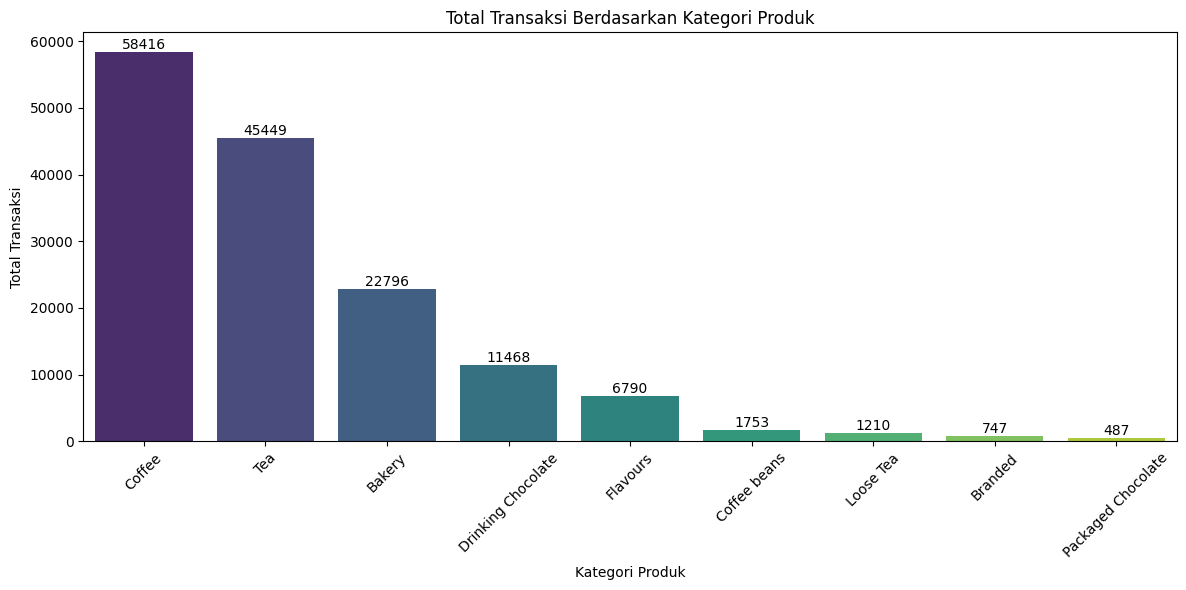

In [23]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=product_cat, x='product_category', y='transaction_id', palette='viridis')
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')
plt.title('Total Transaksi Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-24-7d5aba446b77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette)
<ipython-input-24-7d5aba446b77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette)
<ipython-input-24-7d5aba446b77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette

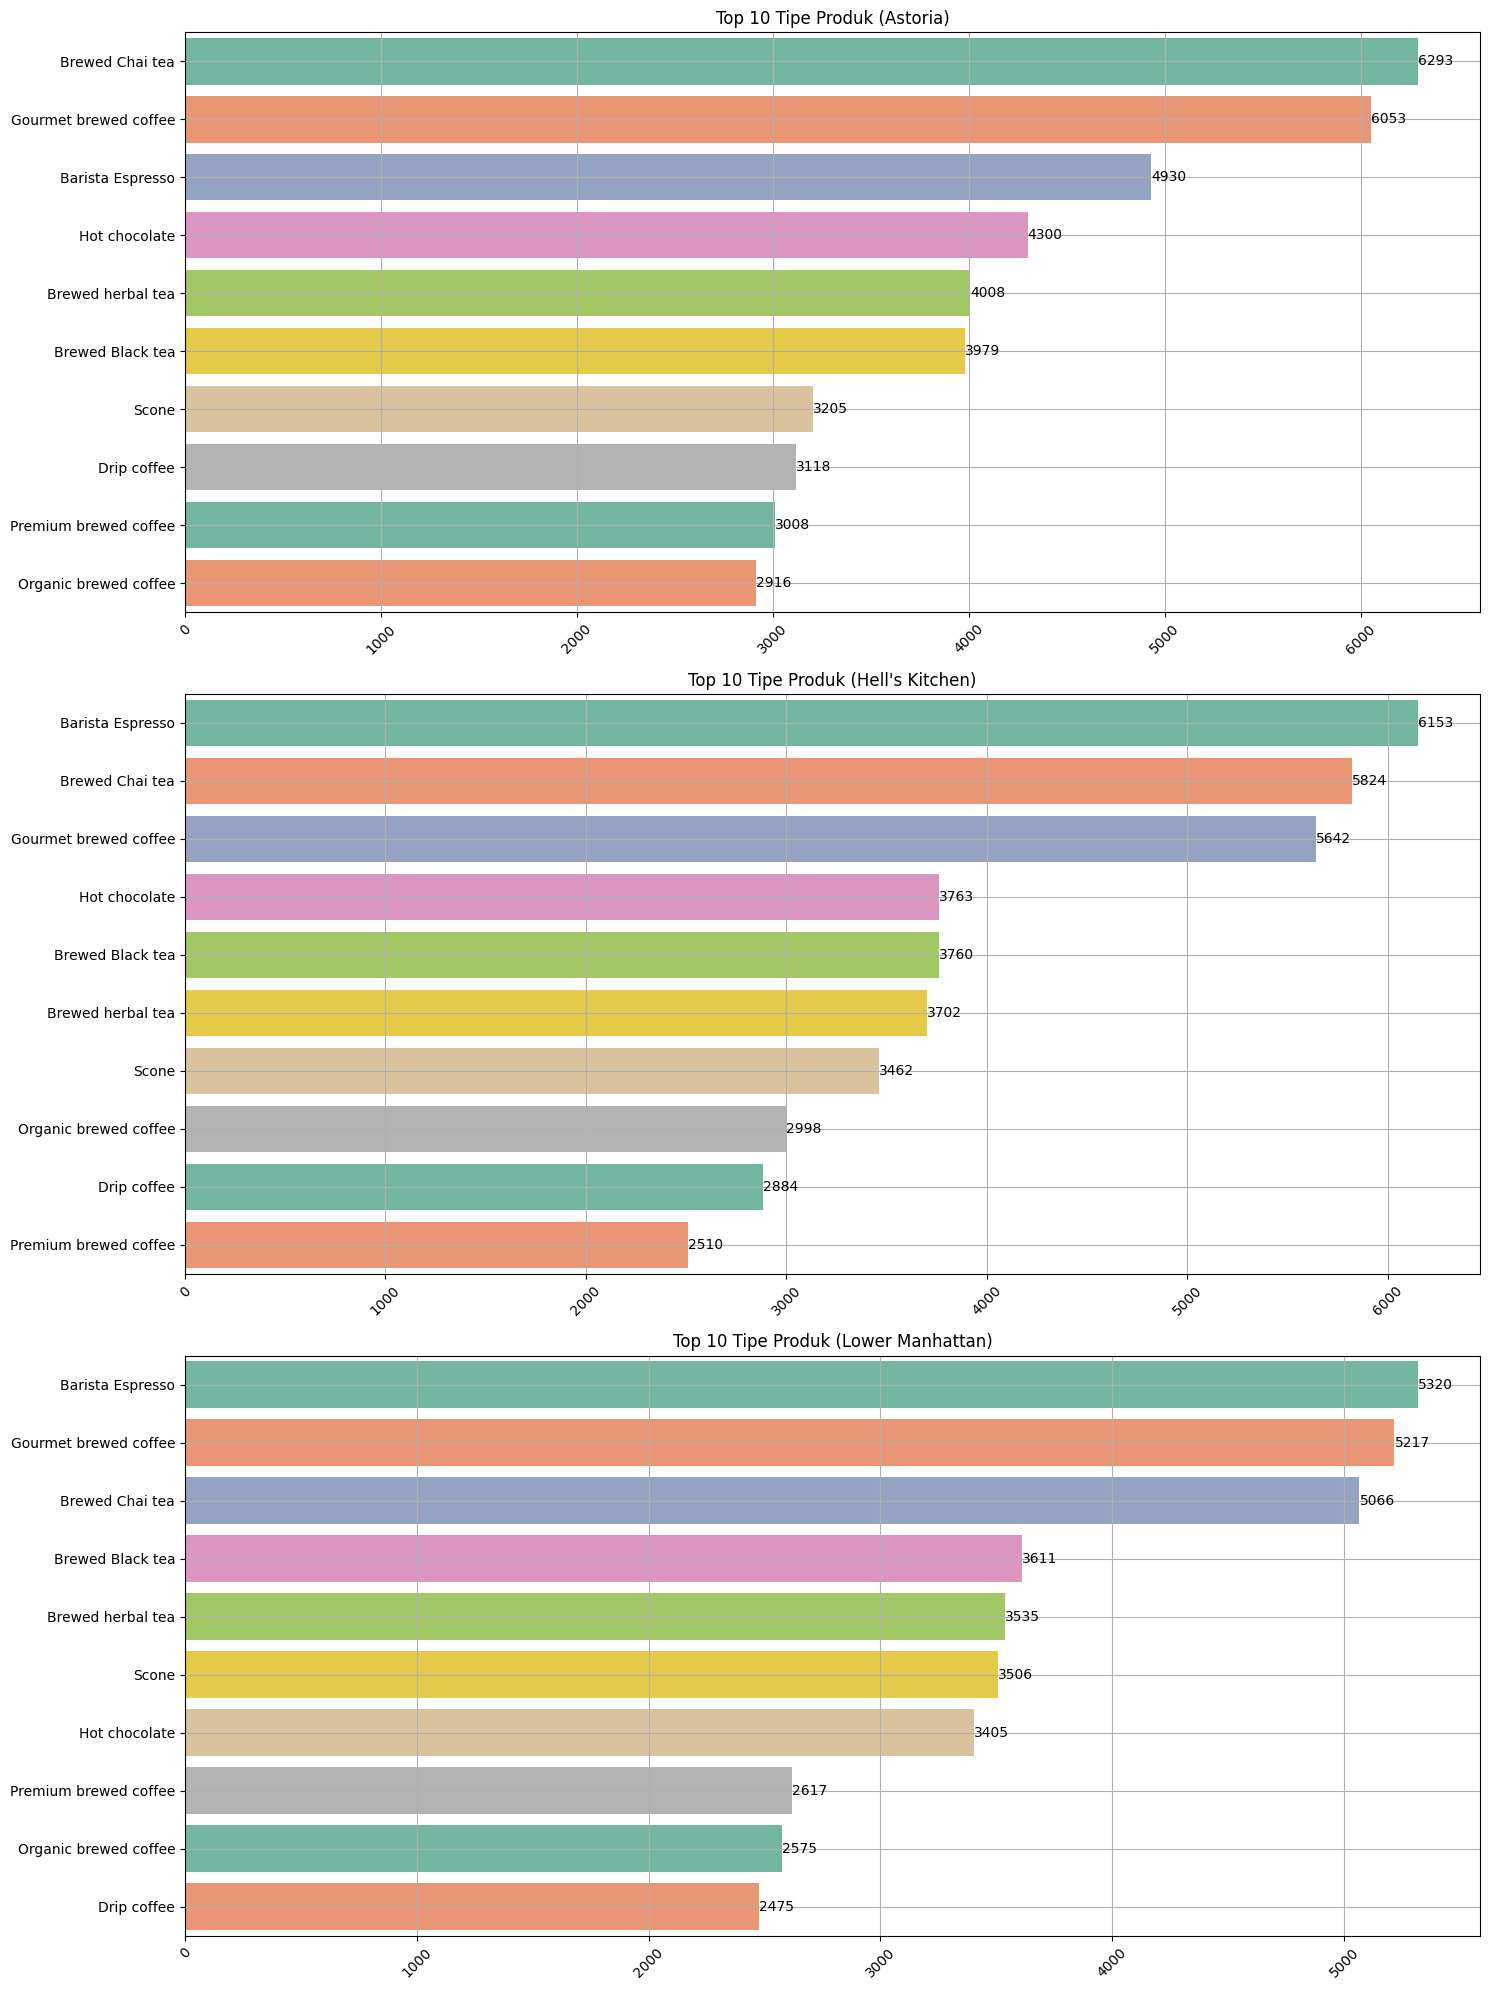

In [24]:
count = df.groupby(["store_location", "product_type"]).size().reset_index(name = "count")

location = count['store_location'].unique()

fig, axes = plt.subplots(3, 1, figsize=(15, 20))
axes = axes.flatten()
for i, category in enumerate(location):
    subset = count[count['store_location'] == category]
    subset = subset.sort_values('count', ascending=False).head(10)
    palette = sns.color_palette("Set2", n_colors=len(subset))
    sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette)
    axes[i].set_title(f'Top 10 Tipe Produk ({category})')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha='left', va='center')
for j in range(len(location), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

<ipython-input-25-c58a94edc9ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i], order=subset['product_detail'], palette=palette)
<ipython-input-25-c58a94edc9ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i], order=subset['product_detail'], palette=palette)
<ipython-input-25-c58a94edc9ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i], order=subset['product_detail'], pal

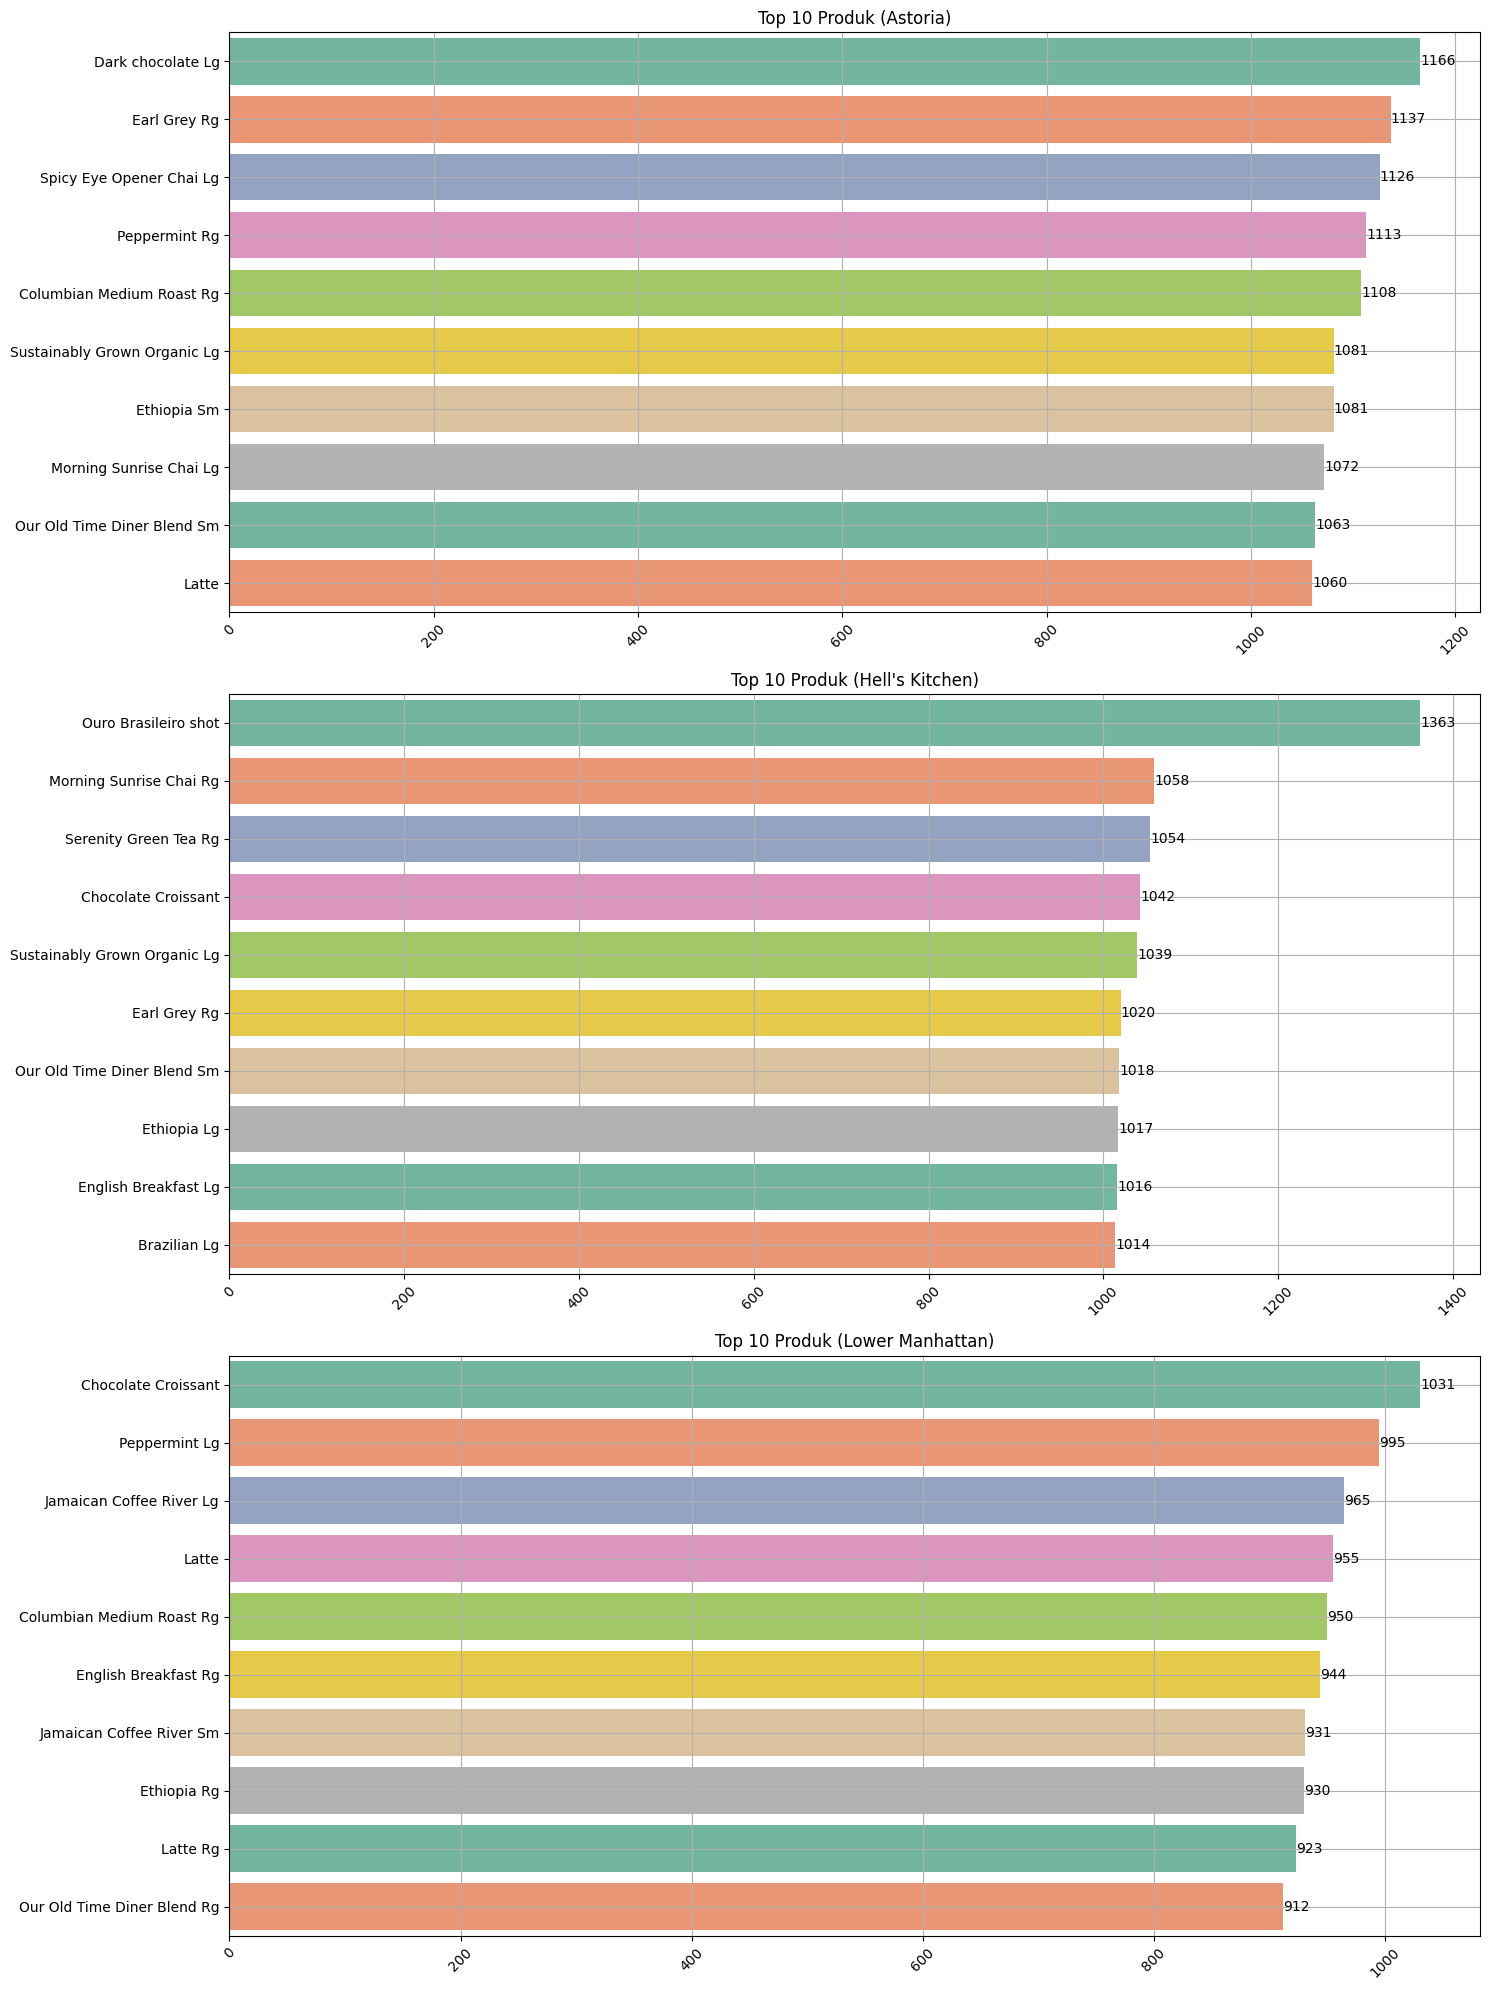

In [25]:
prod_detail = df.groupby(["store_location", "product_detail"]).size().reset_index(name = "count")

loc = prod_detail['store_location'].unique()

fig, axes = plt.subplots(3, 1, figsize=(15, 20))
axes = axes.flatten()
for i, category in enumerate(loc):
    subset = prod_detail[prod_detail['store_location'] == category]
    subset = subset.sort_values('count', ascending=False).head(10)
    palette = sns.color_palette("Set2", n_colors=len(subset))
    sns.barplot(x='count', y='product_detail', data=subset, ax=axes[i], order=subset['product_detail'], palette=palette)
    axes[i].set_title(f'Top 10 Produk ({category})')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha='left', va='center')
for j in range(len(loc), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

<ipython-input-26-3e410135ad37>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette)
<ipython-input-26-3e410135ad37>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette)
<ipython-input-26-3e410135ad37>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette

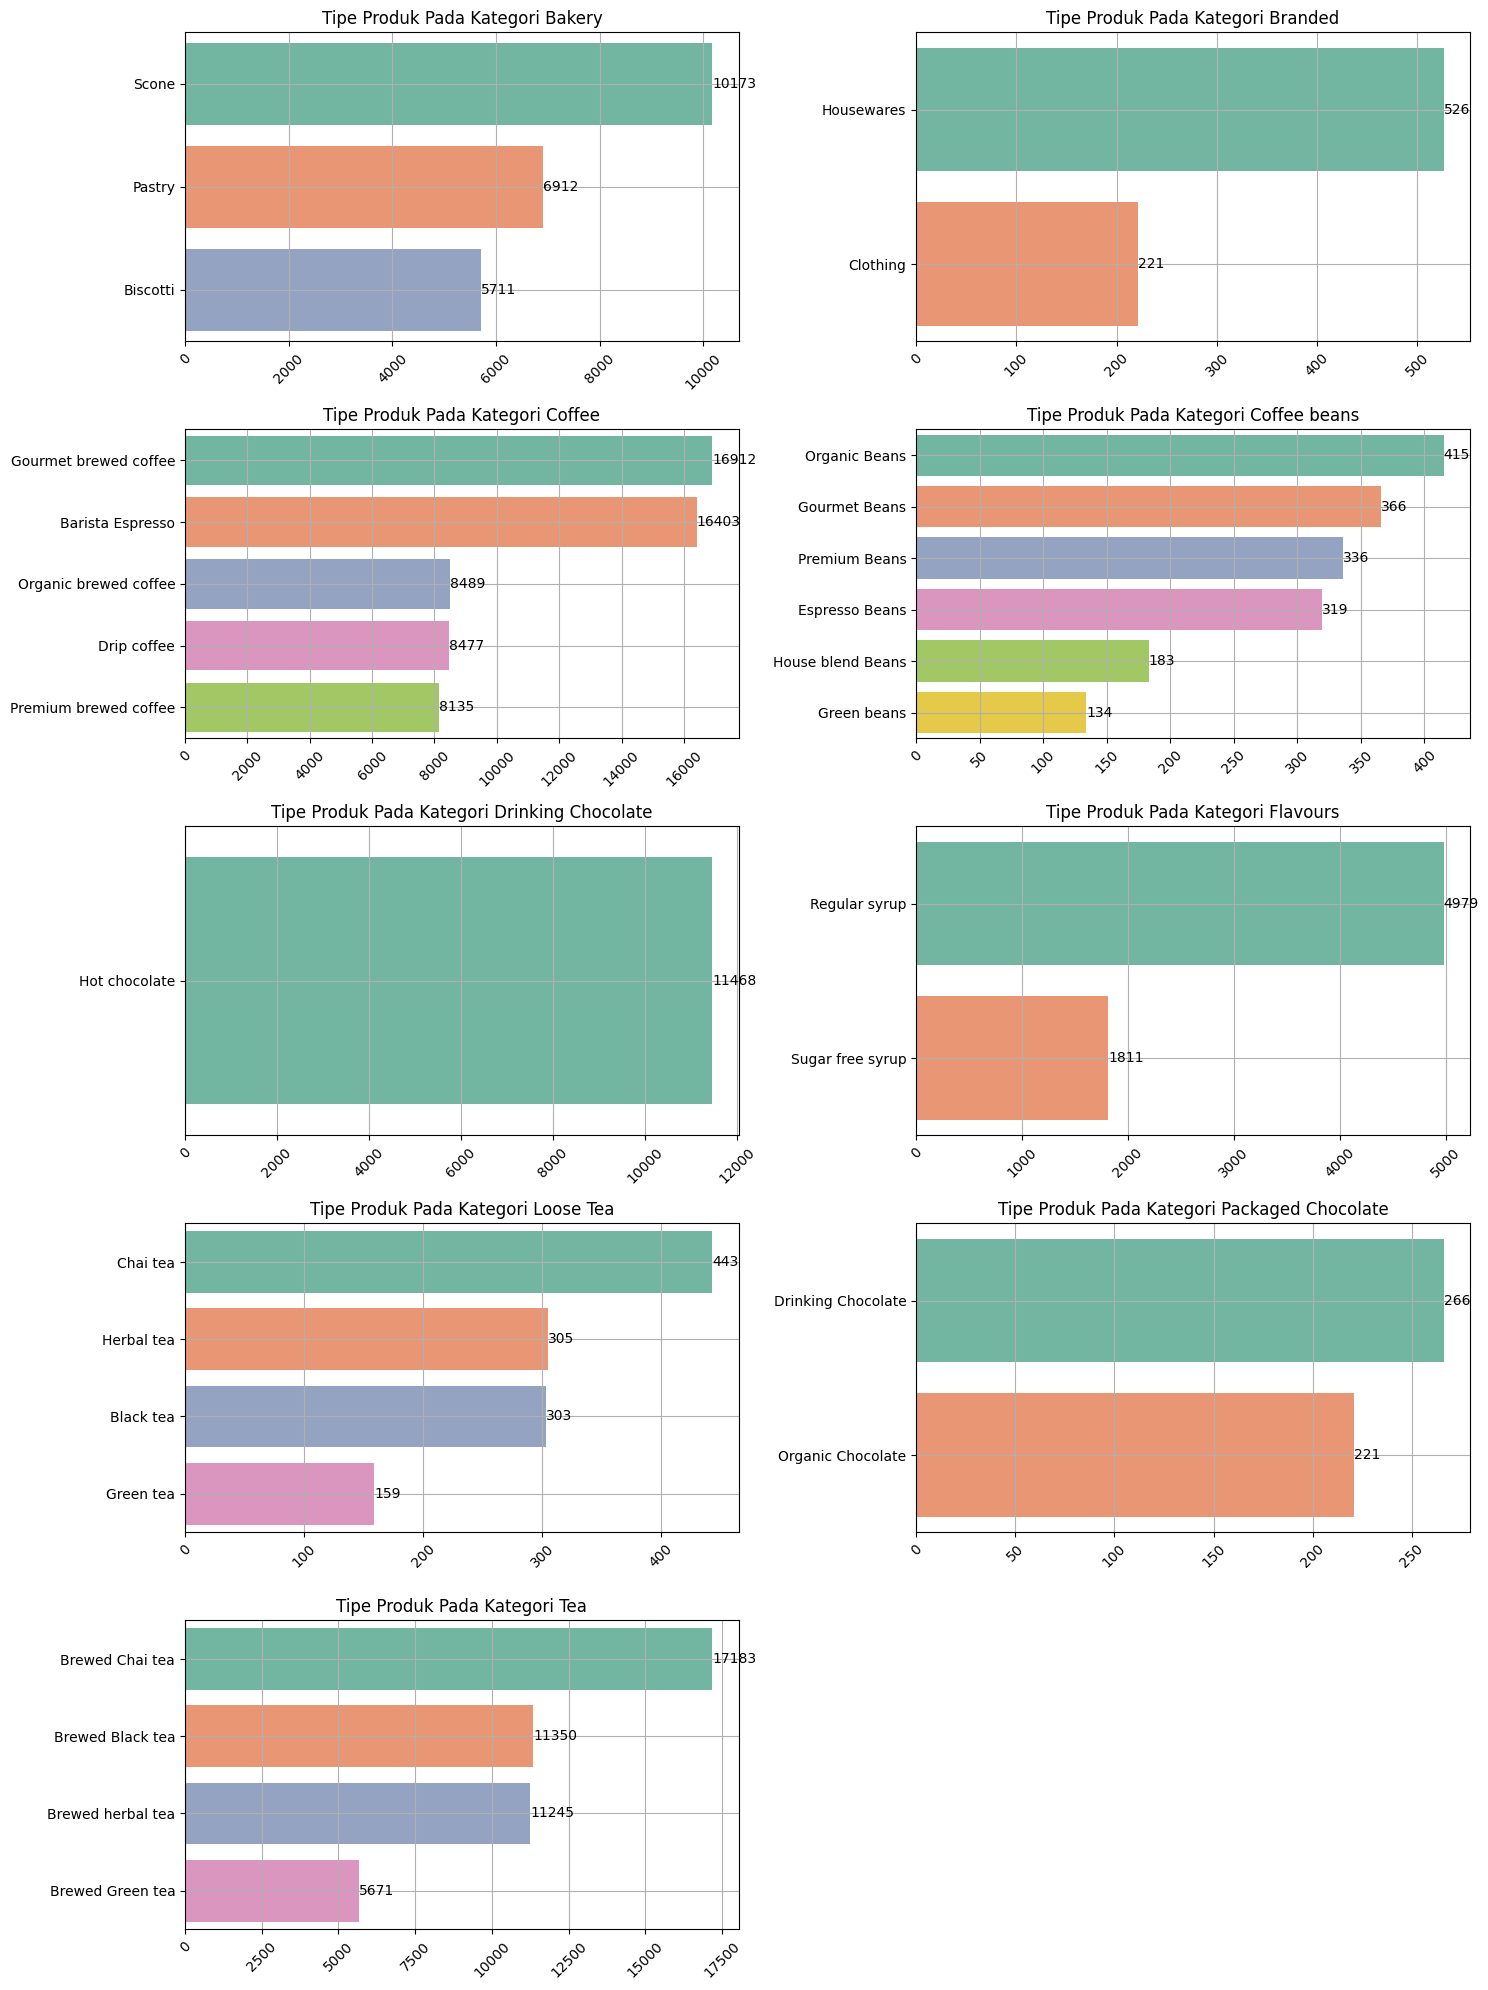

In [26]:
counts = df.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

categories = counts['product_category'].unique()

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()
for i, category in enumerate(categories):
    subset = counts[counts['product_category'] == category]
    subset = subset.sort_values('count', ascending=False)
    palette = sns.color_palette("Set2", n_colors=len(subset))
    sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette=palette)
    axes[i].set_title(f'Tipe Produk Pada Kategori {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha='left', va='center')
for j in range(len(categories), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

In [27]:
location_revenue = df.groupby('store_location')['total_revenue'].sum().reset_index()
location_revenue = location_revenue.sort_values(by='total_revenue', ascending=False)
location_revenue

,store_location,total_revenue
1,Hell's Kitchen,236511.17
0,Astoria,232243.91
2,Lower Manhattan,230057.25


<ipython-input-28-23ae0f402050>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=location_revenue, x='store_location', y='total_revenue', palette='viridis')


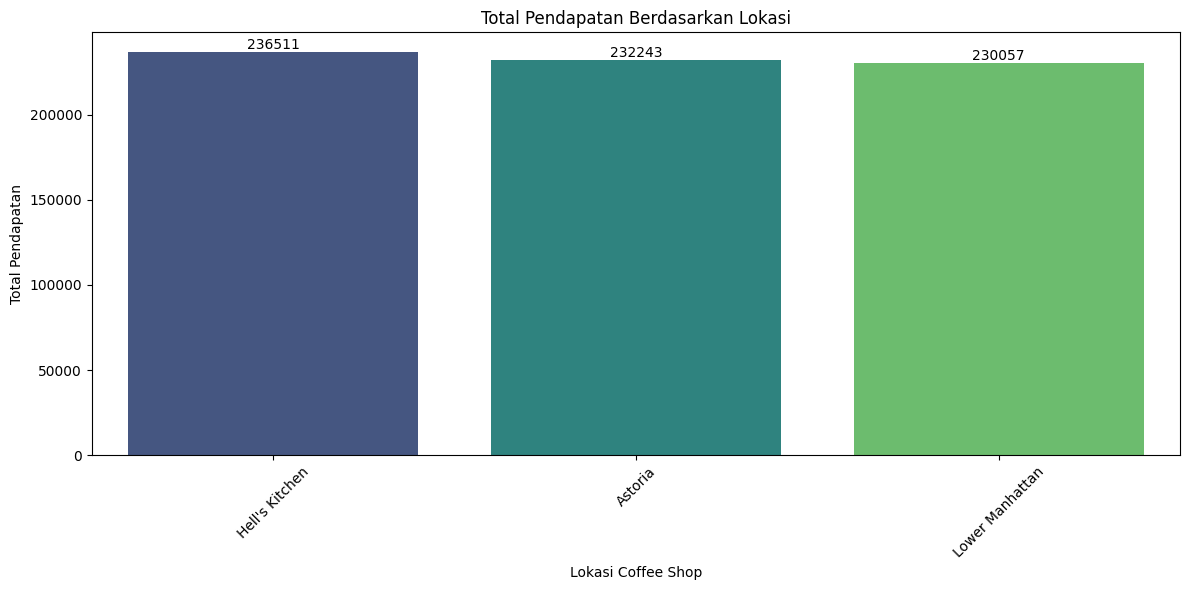

In [28]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=location_revenue, x='store_location', y='total_revenue', palette='viridis')
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')
plt.title('Total Pendapatan Berdasarkan Lokasi')
plt.xlabel('Lokasi Coffee Shop')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
prod_time = df.groupby(['time','store_location','product_detail'])['transaction_qty'].sum().reset_index()
top_products = prod_time.groupby(['time', 'store_location']).apply(lambda x: x.nlargest(3, 'transaction_qty')).reset_index(drop=True)
print(top_products)

     time   store_location                product_detail  transaction_qty
0   Malam          Astoria         Serenity Green Tea Lg              150
1   Malam          Astoria                  Brazilian Rg              137
2   Malam          Astoria       Morning Sunrise Chai Rg              136
3   Malam   Hell's Kitchen          Ouro Brasileiro shot              152
4   Malam   Hell's Kitchen  Sustainably Grown Organic Lg              144
5   Malam   Hell's Kitchen       Morning Sunrise Chai Lg              125
6   Malam  Lower Manhattan                Lemon Grass Rg               31
7   Malam  Lower Manhattan         Serenity Green Tea Lg               20
8   Malam  Lower Manhattan                Hazelnut syrup               16
9    Pagi          Astoria                   Ethiopia Sm              947
10   Pagi          Astoria             Dark chocolate Lg              940
11   Pagi          Astoria                         Latte              880
12   Pagi   Hell's Kitchen          Ou

<ipython-input-29-8a8044e0353f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = prod_time.groupby(['time', 'store_location']).apply(lambda x: x.nlargest(3, 'transaction_qty')).reset_index(drop=True)


<ipython-input-30-9242d8e27f87>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-30-9242d8e27f87>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-30-9242d8e27f87>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-30-9242d8e27f87>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,


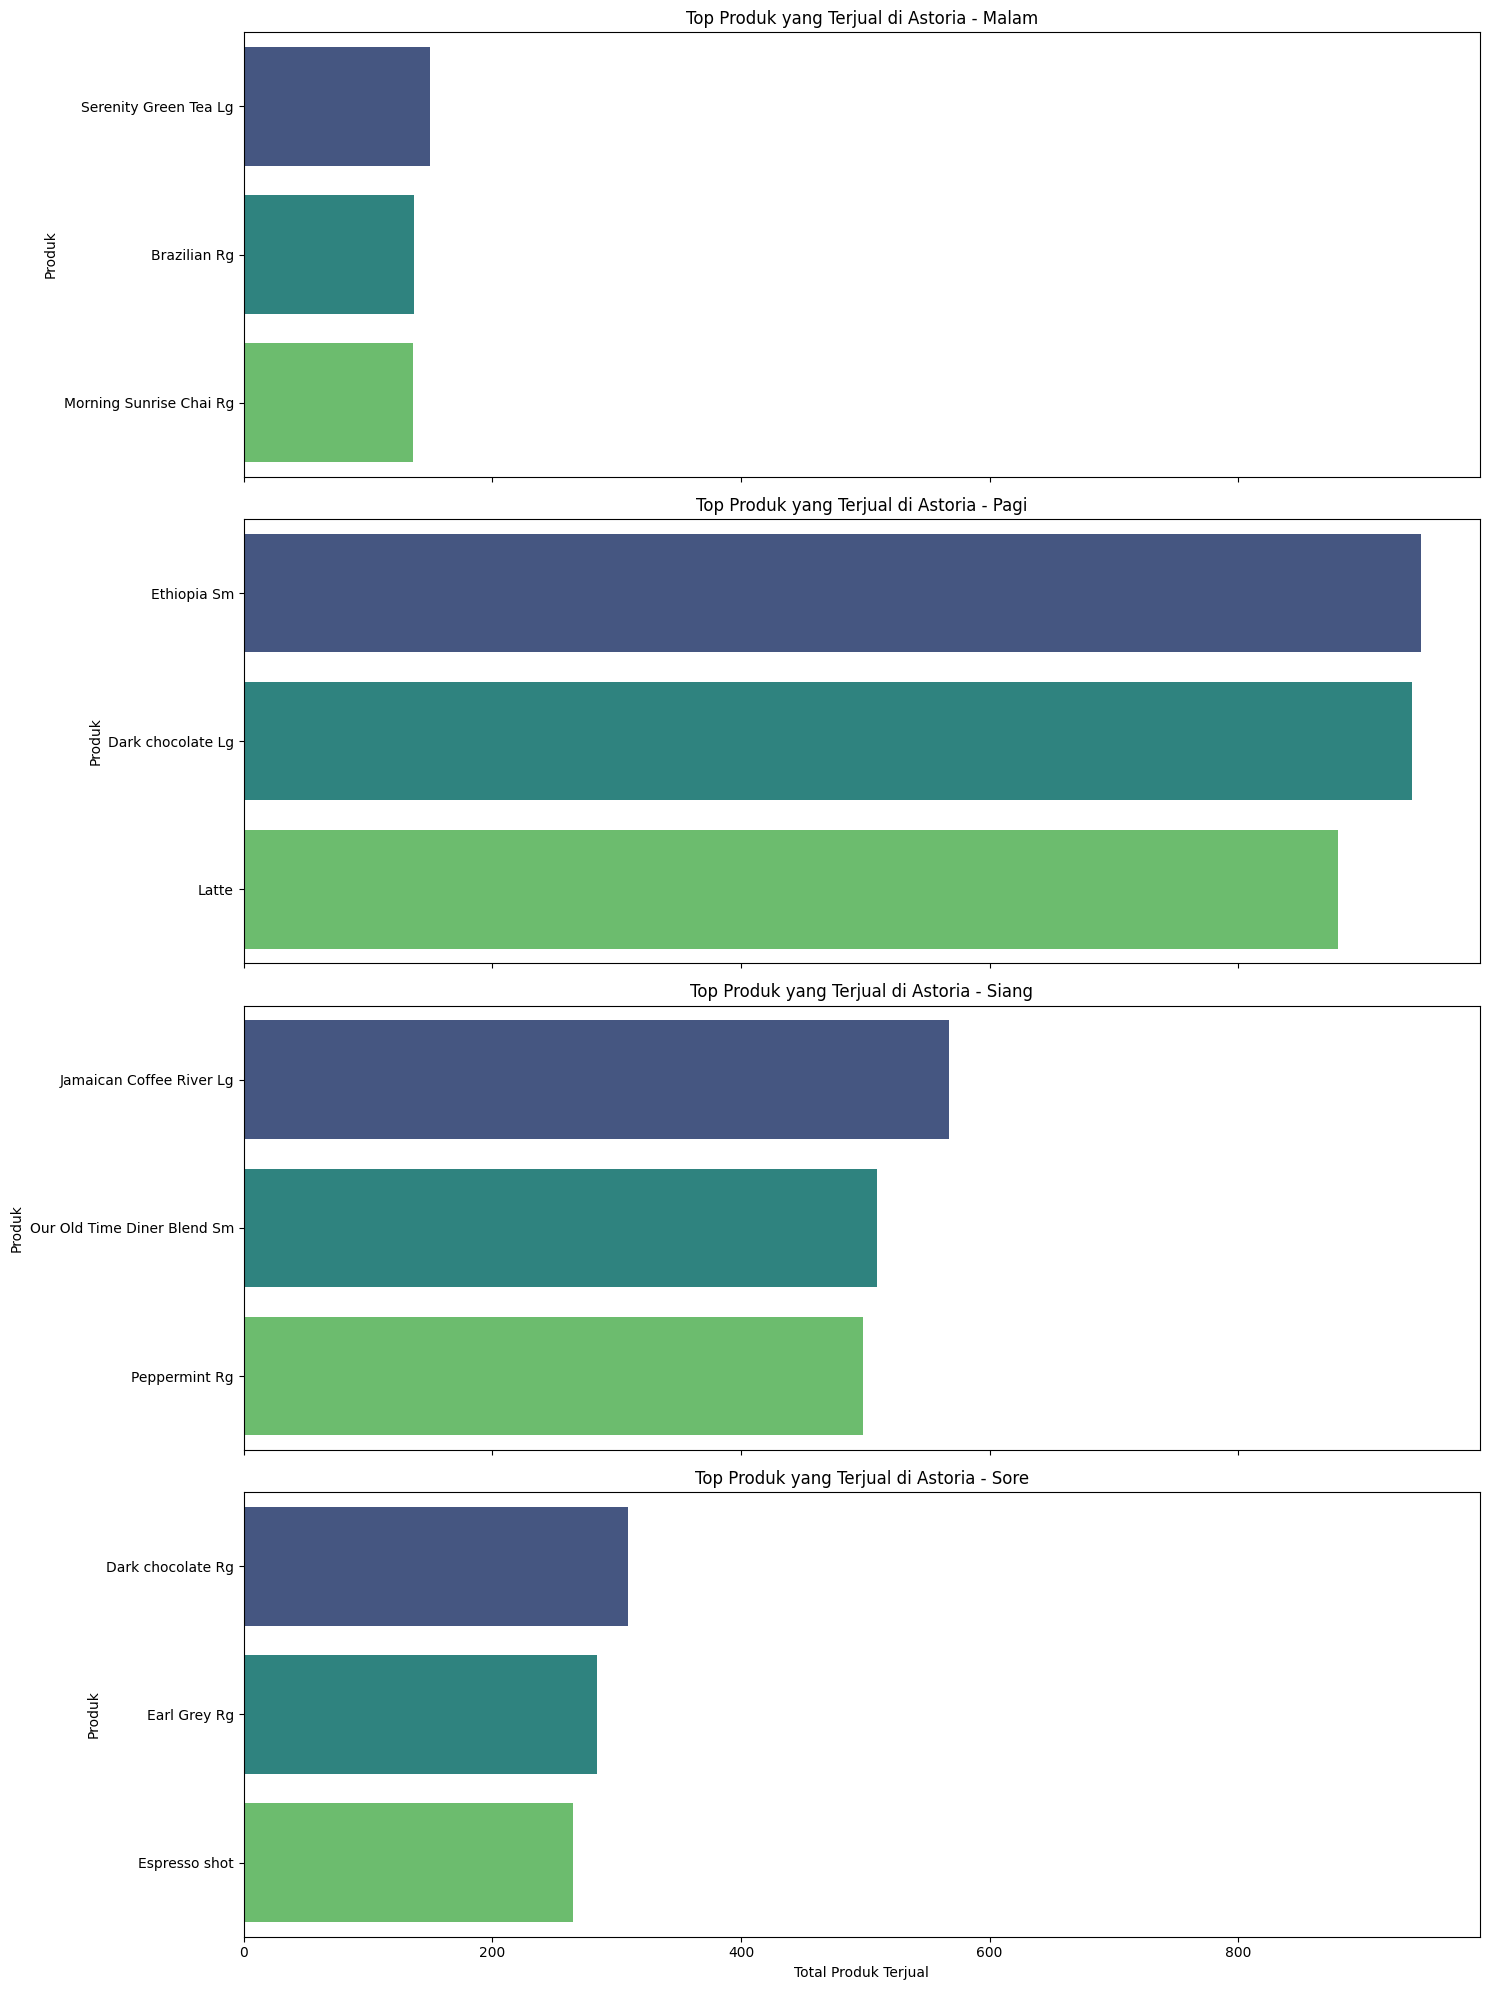

In [30]:
# Astoria
astoria_data = top_products[top_products['store_location'] == "Astoria"]

# Get unique time categories
time_categories = astoria_data['time'].unique()

# Create subplots
num_times = len(time_categories)
fig, axes = plt.subplots(num_times, 1, figsize=(15, 5 * num_times), sharex=True)
for ax, time in zip(axes, time_categories):
    time_data = astoria_data[astoria_data['time'] == time]
    sns.barplot(data=time_data,
                 x='transaction_qty',
                 y='product_detail',
                 ax=ax,
                 palette='viridis')
    ax.set_title(f'Top Produk yang Terjual di Astoria - {time}')
    ax.set_xlabel('Total Produk Terjual')
    ax.set_ylabel('Produk')
plt.tight_layout()
plt.show()

<ipython-input-32-032375ad9b48>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-32-032375ad9b48>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-32-032375ad9b48>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-32-032375ad9b48>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,


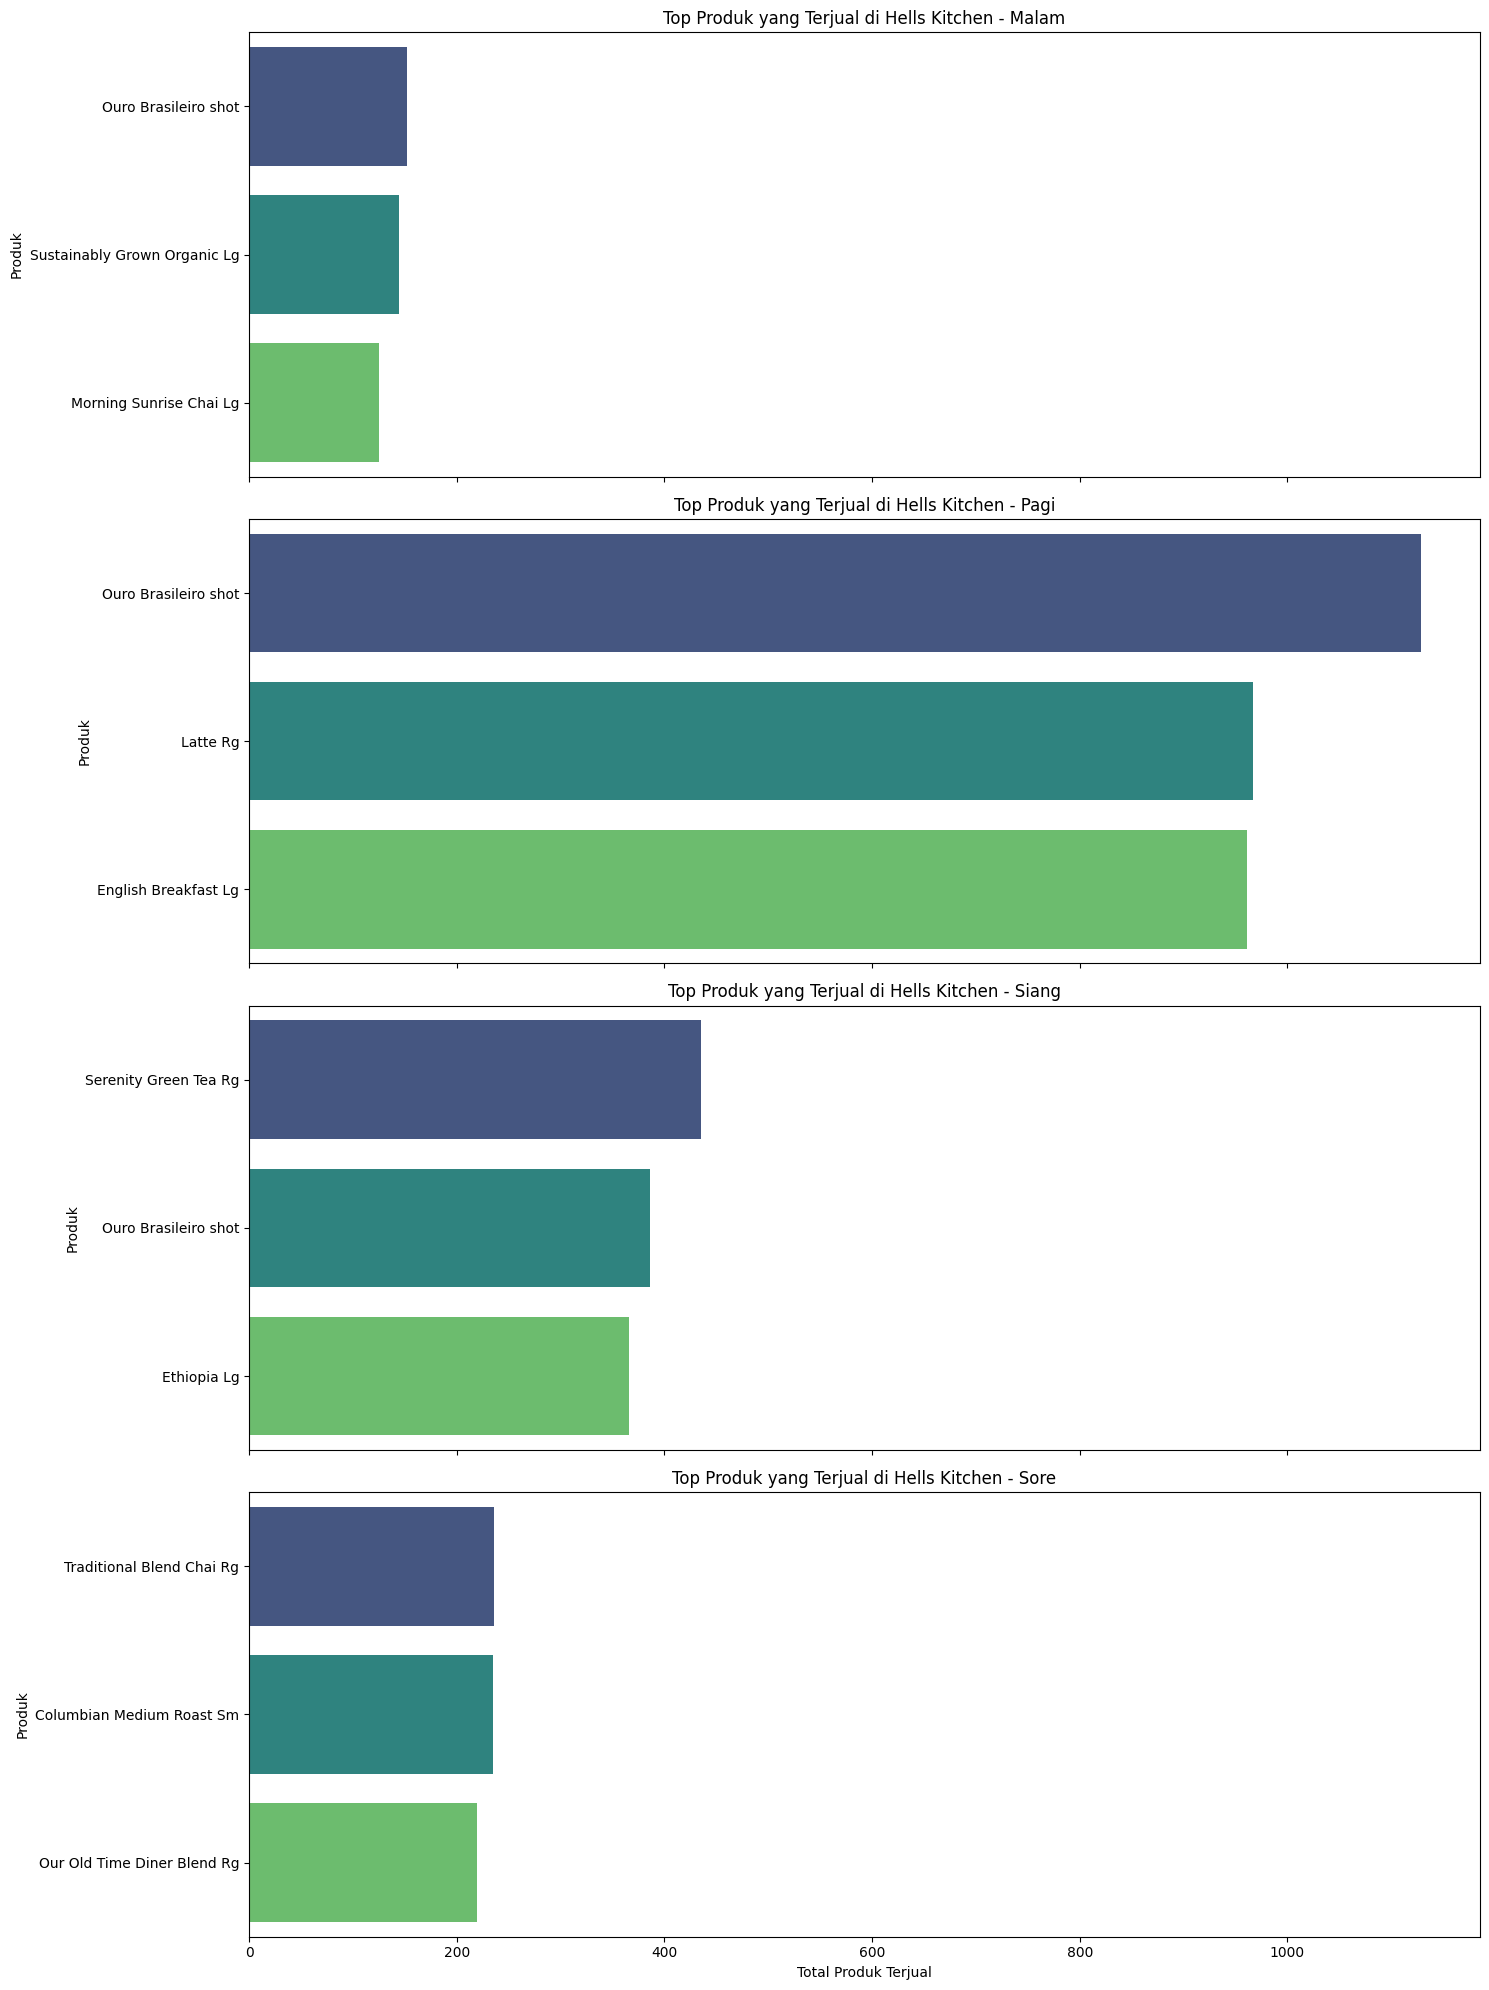

In [32]:
# Hell's Kitchen
kitchen_data = top_products[top_products['store_location'] == "Hell's Kitchen"]

# Get unique time categories
time_categories = kitchen_data['time'].unique()

# Create subplots
num_times = len(time_categories)
fig, axes = plt.subplots(num_times, 1, figsize=(15, 5 * num_times), sharex=True)
for ax, time in zip(axes, time_categories):
    time_data = kitchen_data[kitchen_data['time'] == time]
    sns.barplot(data=time_data,
                 x='transaction_qty',
                 y='product_detail',
                 ax=ax,
                 palette='viridis')
    ax.set_title(f'Top Produk yang Terjual di Hells Kitchen - {time}')
    ax.set_xlabel('Total Produk Terjual')
    ax.set_ylabel('Produk')
plt.tight_layout()
plt.show()

<ipython-input-33-f8a1448bf640>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-33-f8a1448bf640>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-33-f8a1448bf640>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,
<ipython-input-33-f8a1448bf640>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_data,


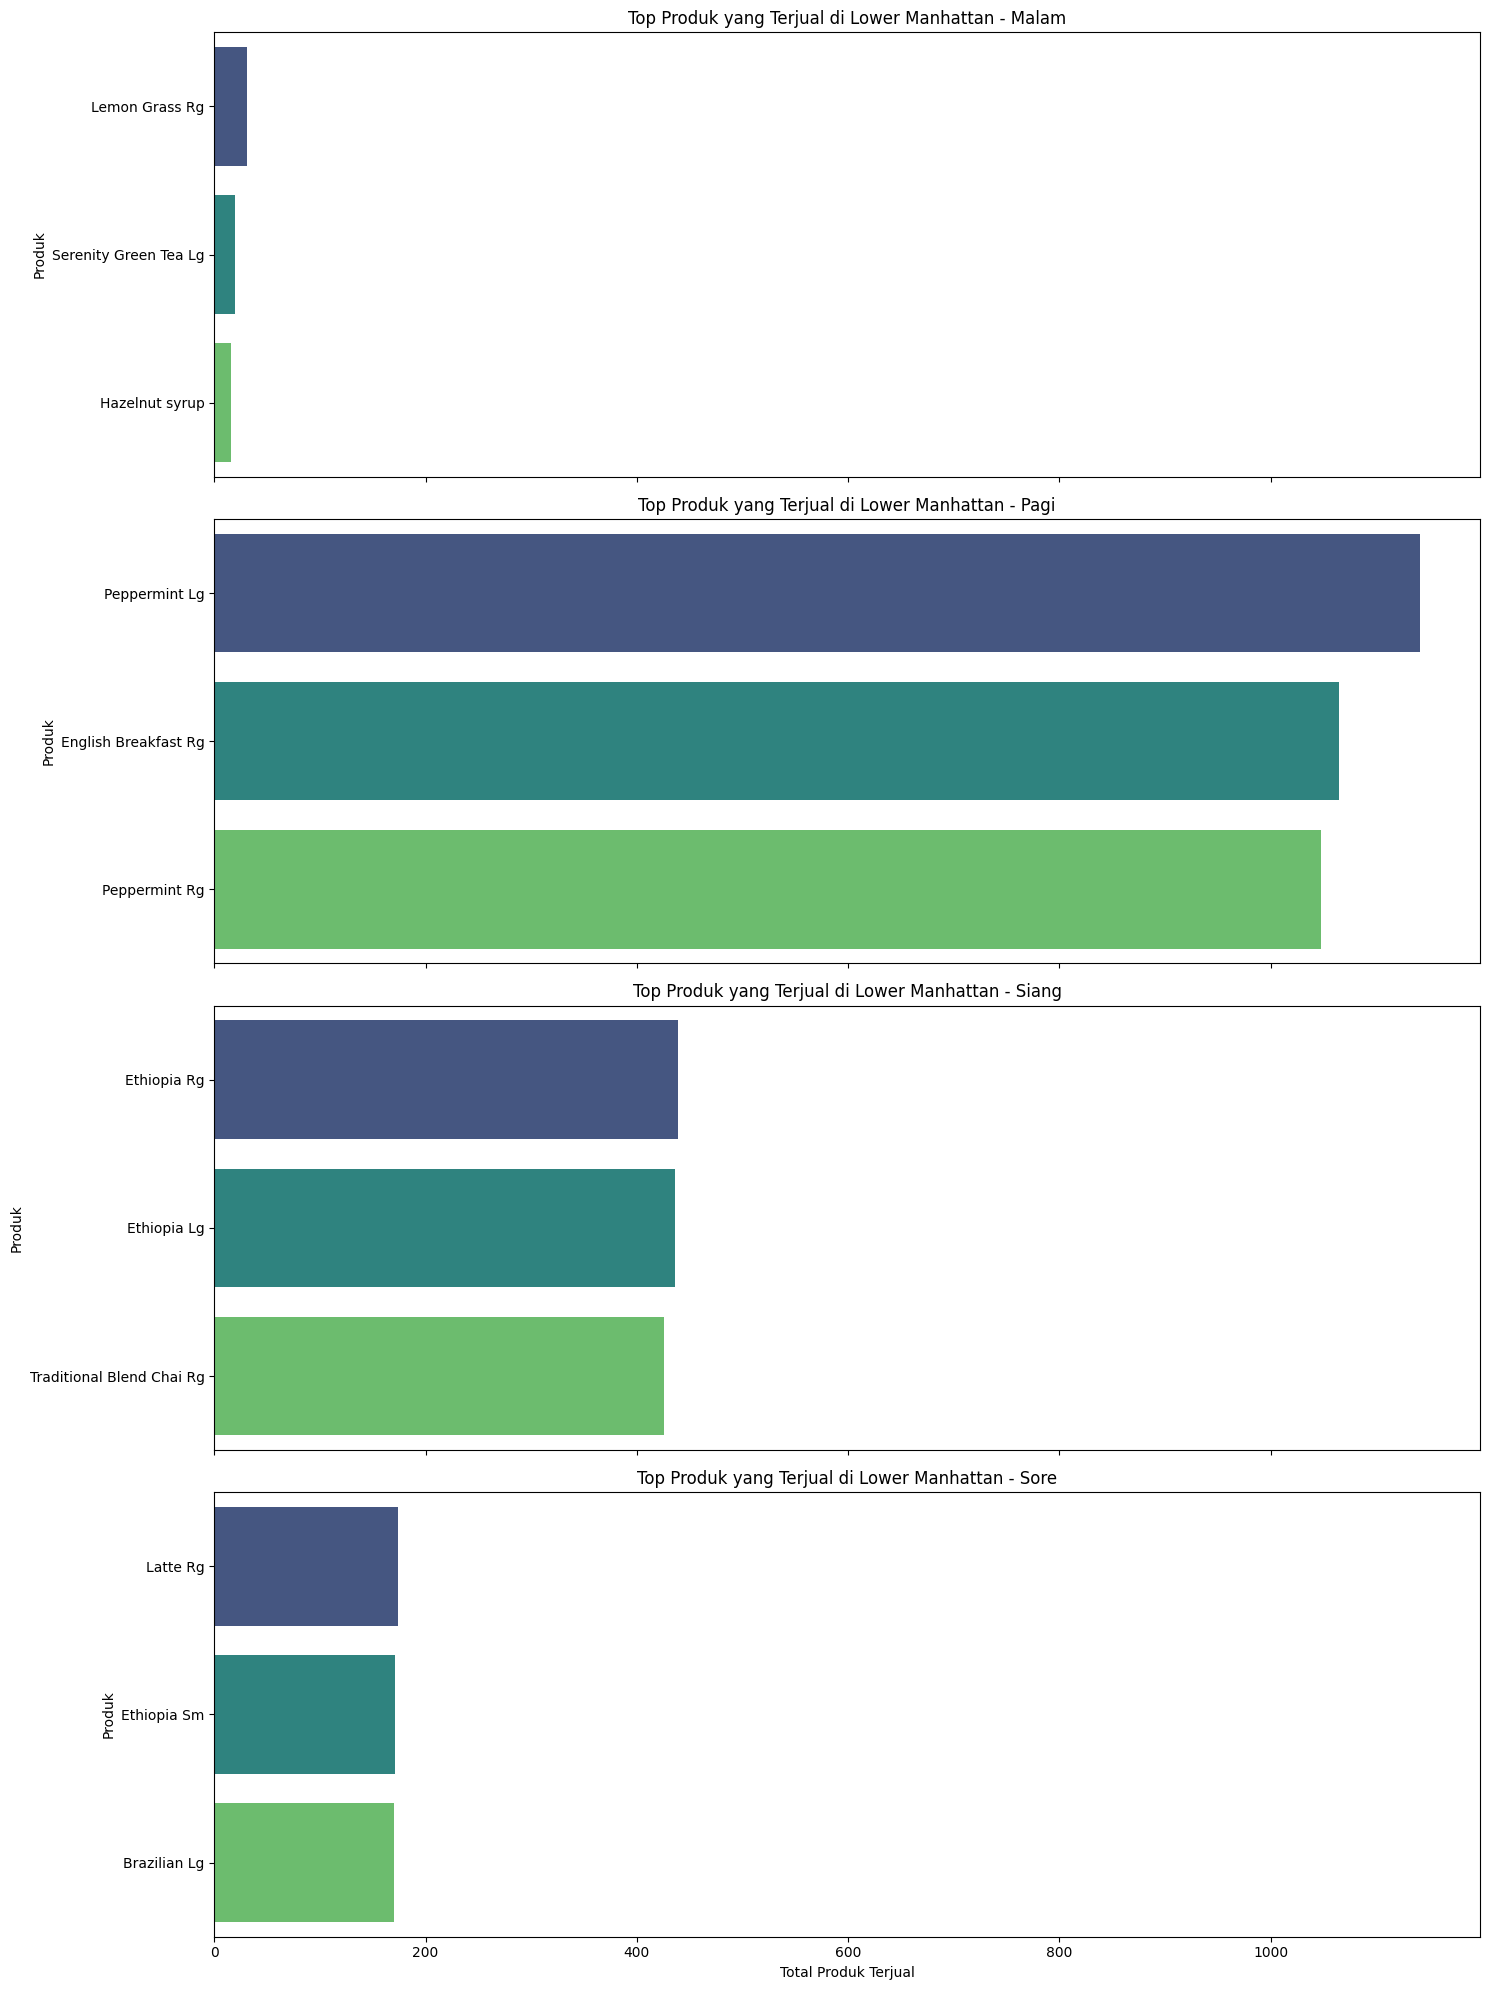

In [33]:
# Lower Manhattan
manhattan_data = top_products[top_products['store_location'] == "Lower Manhattan"]

# Get unique time categories
time_categories = manhattan_data['time'].unique()

# Create subplots
num_times = len(time_categories)
fig, axes = plt.subplots(num_times, 1, figsize=(15, 5 * num_times), sharex=True)
for ax, time in zip(axes, time_categories):
    time_data = manhattan_data[manhattan_data['time'] == time]
    sns.barplot(data=time_data,
                 x='transaction_qty',
                 y='product_detail',
                 ax=ax,
                 palette='viridis')
    ax.set_title(f'Top Produk yang Terjual di Lower Manhattan - {time}')
    ax.set_xlabel('Total Produk Terjual')
    ax.set_ylabel('Produk')
plt.tight_layout()
plt.show()